In [53]:
import ast
import pandas as pd

from functools import reduce

from matplotlib import pyplot as plt

In [126]:
def str_to_list(s):
    return ast.literal_eval(s)

df = pd.read_csv('sentences.csv', converters={'tokens': str_to_list, 'raw_tokens': str_to_list}, index_col=0)

In [127]:
df

,tokens,statement_index,raw_tokens,topic_gen,text,topic_crit
0,"[inform, receiv, sinc, feder, open, market, co...",0,"[Information, received, since, the, Federal, O...",11.0,inform receiv sinc feder open market committe ...,11.0
1,"[balanc, labor, market, condit, improv, somewh...",0,"[On, balance, ,, labor, market, conditions, im...",4.0,balanc labor market condit improv somewhat how...,12.0
2,"[household, spend, appear, rise, moder, busi, ...",0,"[Household, spending, appears, to, be, rising,...",8.0,household spend appear rise moder busi fix inv...,8.0
3,"[fiscal, polici, restrain, econom, growth, alt...",0,"[Fiscal, policy, is, restraining, economic, gr...",0.0,fiscal polici restrain econom growth although ...,0.0
4,"[inflat, run, committe, 's, longerrun, object]",0,"[Inflation, has, been, running, below, the, Co...",10.0,inflat run committe 's longerrun object,10.0
...,...,...,...,...,...,...
1488,"[discount, rate, interest, rate, charg, deposi...",177,"[The, discount, rate, is, the, interest, rate,...",2.0,discount rate interest rate charg depositori i...,2.0
1489,"[feder, open, market, committe, decid, today, ...",179,"[The, Federal, Open, Market, Committee, decide...",1.0,feder open market committe decid today eas sta...,1.0
1490,"[action, taken, cushion, effect, prospect, eco...",179,"[The, action, was, taken, to, cushion, the, ef...",0.0,action taken cushion effect prospect econom gr...,3.0
1491,"[recent, chang, global, economi, adjust, u.s.,...",179,"[The, recent, changes, in, the, global, econom...",0.0,recent chang global economi adjust u.s. financ...,1.0


In [70]:
ec_sit_topics = [0,3,6,8,12]

maybe = [4,9,11,13,14]
less_sure = [10]

In [72]:
contraction_words = ['decreas', 'decelerat', 'slow', 'weak', 'low', 'loss', 'contract', 'moder', 'subdu', 'fall', 'slower', 'weaker', 'soften', 'deceler', 'cool']
expansion_words = ['increas', 'accelerat', 'fast', 'strong', 'high', 'gain', 'expand', 'improv', 'foster', 'rise', 'risen', 'higher', 'acceler', 'faster', 'strength']

In [128]:
def count_positive(tokens):
    count = 0
    for token in tokens:
        if token in expansion_words:
            count += 1
    return count

In [129]:
def count_negative(tokens):
    count = 0
    for token in tokens:
        if token in contraction_words:
            count += 1
    return count

In [130]:
def total_positive(series):
    return reduce(lambda x, y : x + count_positive(y), series, 0)

In [131]:
def total_negative(series):
    return reduce(lambda x, y : x + count_negative(y), series, 0)

In [132]:
ecsit_sents = df[df['topic_crit'].isin(ec_sit_topics)]

In [123]:
def test(x):
    print(x)
    print(len(x))
    return len(x)

In [134]:
ecsit_sents['sent_length'] = ecsit_sents['raw_tokens'].apply(len)

/tmp/ipykernel_31663/1012916860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecsit_sents['sent_length'] = ecsit_sents['raw_tokens'].apply(len)


In [135]:
ecsit_sents

,tokens,statement_index,raw_tokens,topic_gen,text,topic_crit,sent_length
1,"[balanc, labor, market, condit, improv, somewh...",0,"[On, balance, ,, labor, market, conditions, im...",4.0,balanc labor market condit improv somewhat how...,12.0,35
2,"[household, spend, appear, rise, moder, busi, ...",0,"[Household, spending, appears, to, be, rising,...",8.0,household spend appear rise moder busi fix inv...,8.0,24
3,"[fiscal, polici, restrain, econom, growth, alt...",0,"[Fiscal, policy, is, restraining, economic, gr...",0.0,fiscal polici restrain econom growth although ...,0.0,15
7,"[committe, expect, appropri, polici, accommod,...",0,"[The, Committee, expects, that, ,, with, appro...",4.0,committe expect appropri polici accommod econo...,12.0,37
8,"[committe, see, risk, outlook, econom, activ, ...",0,"[The, Committee, sees, the, risks, to, the, ou...",0.0,committe see risk outlook econom activ labor m...,6.0,38
...,...,...,...,...,...,...,...
1472,"[trend, increas, cost, core, price, gener, rem...",174,"[Trend, increases, in, costs, and, core, price...",3.0,trend increas cost core price gener remain qui...,8.0,13
1473,"[domest, financi, market, recov, foreign, econ...",174,"[But, domestic, financial, markets, have, reco...",0.0,domest financi market recov foreign econom pro...,12.0,21
1474,"[background, alreadytight, domest, labor, mark...",174,"[Against, the, background, of, already-tight, ...",3.0,background alreadytight domest labor market on...,12.0,47
1486,"[backdrop, eas, stanc, monetari, polici, judg,...",177,"[Against, this, backdrop, ,, further, easing, ...",0.0,backdrop eas stanc monetari polici judg warran...,3.0,28


In [136]:
ecsit_agg = ecsit_sents.groupby('statement_index').agg(positive=('tokens', total_positive), negative=('tokens', total_negative), length=('sent_length', sum))

In [137]:
ecsit_agg['sentiment'] = (ecsit_agg['positive'] - ecsit_agg['negative']) / ecsit_agg['length']

In [138]:
ecsit_agg

,positive,negative,length,sentiment
statement_index,,,,
0,5,3,172,0.011628
2,6,3,206,0.014563
3,7,3,183,0.021858
4,7,2,186,0.026882
5,6,2,181,0.022099
...,...,...,...,...
170,1,1,53,0.000000
172,0,0,83,0.000000
174,4,2,81,0.024691


(array([ 4.,  7., 10., 19., 35., 25., 15.,  7.,  1.,  3.]),
 array([-0.04109589, -0.03181389, -0.02253188, -0.01324988, -0.00396788,
         0.00531412,  0.01459613,  0.02387813,  0.03316013,  0.04244214,
         0.05172414]),
 <BarContainer object of 10 artists>)

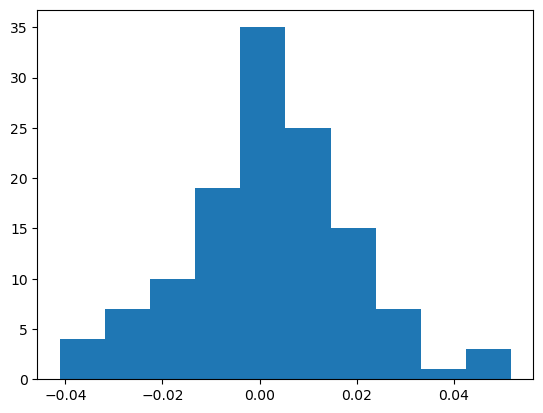

In [139]:
res = ecsit_agg.reset_index()

plt.hist(res['sentiment'])

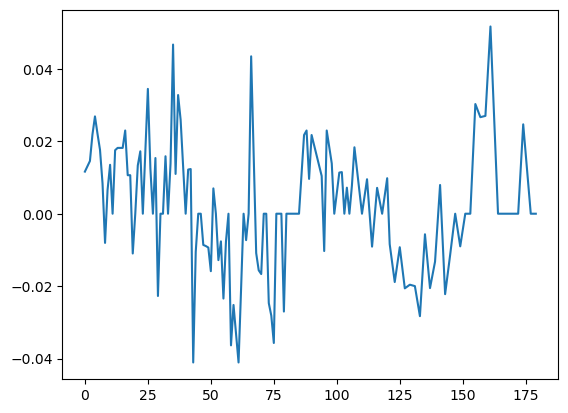

In [140]:
plt.plot(res['statement_index'], res['sentiment'])

In [141]:
stat_df = pd.read_csv('statements.csv')

In [142]:
stat_df = stat_df[~stat_df['title'].duplicated()]

In [143]:
stat_df.rename(columns={'Unnamed: 0': 'statement_index'}, inplace=True)

In [144]:
ecsit_agg['title'] = stat_df['title']

In [145]:
ecsit_agg['date'] = ecsit_agg['title'].apply(lambda x : x.split(' ')[-1])

In [146]:
ecsit_agg['date'] = pd.to_datetime(ecsit_agg['date'])

<Axes: xlabel='date'>

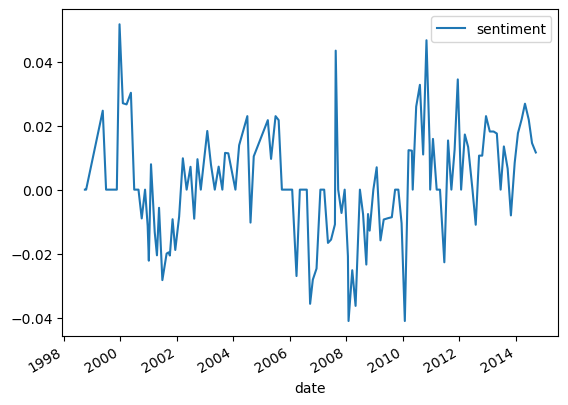

In [147]:
ecsit_agg.plot('date', 'sentiment')